In [1]:
import time
start = time.time()

In [2]:
import os
import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, MaxPooling2D, Conv2D, Dense
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
import random
foo = ['test', 'train']
f = random.choice(foo)
foo1 = ['Dark', 'Light', 'Medium', 'Green']
f1 = random.choice(foo1)

In [4]:
from random import *
e = randrange(100)
print(f'class : {f} name : {f1} num : {e}')
n = f + '/' + f1 + '/' + f1.lower() + ' ' + '(' +str(e) + ')' + '.png'
print(n)
r = r'/content/drive/MyDrive/archive (1)/' + n
print(r)

class : test name : Dark num : 43
test/Dark/dark (43).png
/content/drive/MyDrive/archive (1)/test/Dark/dark (43).png


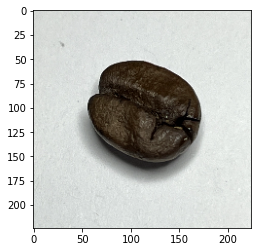

In [5]:
img = cv2.imread(r)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
categories = ['Dark','Green','Light','Medium']
IMG_Size = 100

In [7]:
training_data = []
test_data = []
def create_data(my_data_path,my_data):
    for ct in categories:
      path = os.path.join(my_data_path,ct)
      class_num = categories.index(ct)
      for img in os.listdir(path):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
        generator = datagen.flow_from_directory(my_data_path,shuffle=True)
        try:
          img_array = cv2.imread(os.path.join(path,img))
          # img_array = img_array / 255
          img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
          new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
          my_data.append([new_array,class_num])
        except Exception as e:
          pass

In [ ]:
train_data_path = '/content/drive/MyDrive/archive (1)/test'
test_data_path = '/content/drive/MyDrive/archive (1)/train'
create_data(train_data_path,training_data)
create_data(test_data_path,test_data)

In [9]:
x = []
y = []

for features, label in training_data:
  x.append(features)
  y.append(label)
  
x_test = []
y_test = []

for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

In [10]:
y = np.array(y)
y_test = np.array(y_test)

x = np.array(x).reshape(-1, IMG_Size, IMG_Size, 3)
x_test = np.array(x_test).reshape(-1, IMG_Size, IMG_Size, 3)

In [11]:
early_stopping_monitor = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
)

best_model = ModelCheckpoint('/content/drive/MyDrive/bestmodel.hdf5', monitor='accuracy', save_best_only=True)
best_val_acc = ModelCheckpoint('/content/drive/MyDrive/best_val_acc.hdf5', monitor='val_accuracy', save_best_only=True)

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_Size, IMG_Size, 3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(Dense(4, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy', # binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy
    optimizer=opt,
    run_eagerly=True,
    metrics=['accuracy']
)

hist = model.fit(x, y, validation_split=.1, verbose=2, epochs=50, shuffle=True, batch_size=64, callbacks=[
    early_stopping_monitor,
    reduce_lr_on_plateau,
    best_model, best_val_acc])

Epoch 1/50
6/6 - 8s - loss: 68.7694 - accuracy: 0.2830 - val_loss: 11.0875 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 2/50
6/6 - 7s - loss: 1.8550 - accuracy: 0.4588 - val_loss: 2.0916 - val_accuracy: 0.0244 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 3/50
6/6 - 7s - loss: 0.8261 - accuracy: 0.6841 - val_loss: 1.7440 - val_accuracy: 0.0976 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 4/50
6/6 - 8s - loss: 0.5206 - accuracy: 0.7995 - val_loss: 0.9740 - val_accuracy: 0.4878 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 5/50
6/6 - 8s - loss: 0.3410 - accuracy: 0.8709 - val_loss: 1.1839 - val_accuracy: 0.3902 - lr: 0.0010 - 8s/epoch - 1s/step
Epoch 6/50
6/6 - 7s - loss: 0.1678 - accuracy: 0.9396 - val_loss: 1.6603 - val_accuracy: 0.4878 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 7/50
6/6 - 7s - loss: 0.1062 - accuracy: 0.9560 - val_loss: 0.2400 - val_accuracy: 0.9024 - lr: 0.0010 - 7s/epoch - 1s/step
Epoch 8/50
6/6 - 7s - loss: 0.0731 - accuracy: 0.9753 - val_loss: 1.7476 - val_accur

In [13]:
hist.history??

In [14]:
def visualization(name,h,color):
  t = h.history[name]
  my_max = max(t)
  my_min = min(t)
  print(f'Name : {name} max : {my_max} min : {my_min}')
  plt.plot(t,color=color,linewidth=3.0)
  plt.title(name)
  plt.ylabel(name)
  plt.xlabel('Epoch')
  plt.legend([name],loc='upper left')
  plt.show()

Name : accuracy max : 0.9835164546966553 min : 0.2829670310020447


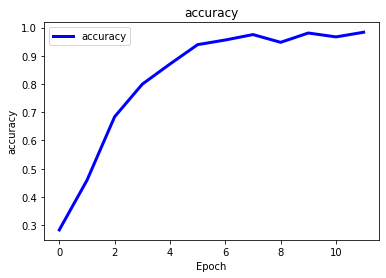

Name : loss max : 68.7694091796875 min : 0.03545208275318146


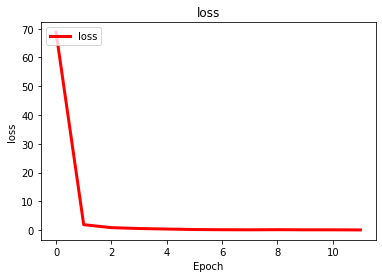

Name : val_accuracy max : 0.9024389982223511 min : 0.0


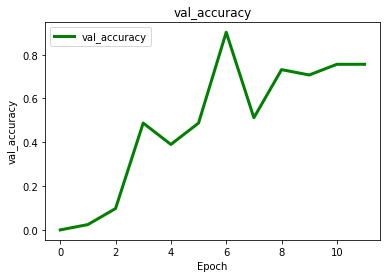

Name : val_loss max : 11.087516784667969 min : 0.2399561107158661


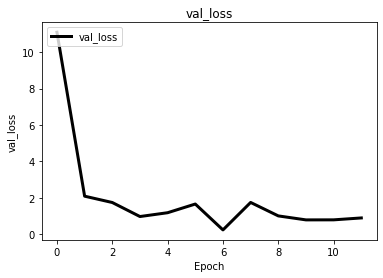

In [15]:
visualization('accuracy',hist,'Blue')
visualization('loss',hist,'Red')
visualization('val_accuracy',hist,'Green')
visualization('val_loss',hist,'Black')

In [16]:
model.load_weights('/content/drive/MyDrive/bestmodel.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

38/38 [==============================] - 7s 181ms/step - loss: 0.1309 - accuracy: 0.9592
test loss, test acc: [0.1308530867099762, 0.9591666460037231]


In [17]:
def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred

def my_f1_score(my_y_test,my_y_pred):
  f1 = f1_score(my_y_test, my_y_pred, average="micro")
  return f1

def my_conf_matrix(my_y_test,my_y_pred):
  cm = confusion_matrix(my_y_test, my_y_pred)
  cm_norm = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
  sns.heatmap(cm_norm,cmap='Greens',annot=True,
              cbar_kws={'orientation' : 'vertical','label' : 'Color bar'},
              fmt='.2f'
              )
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

0.9591666666666666


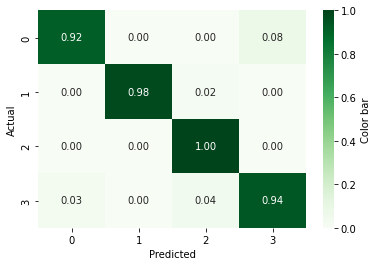

In [18]:
y_pred_res = my_predict(model,x_test)
y_pred_res = np.argmax(y_pred_res, axis=-1)
print(my_f1_score(y_test,y_pred_res))
my_conf_matrix(y_test,y_pred_res)

In [19]:
model.load_weights('/content/drive/MyDrive/best_val_acc.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

38/38 [==============================] - 7s 180ms/step - loss: 0.1309 - accuracy: 0.9592
test loss, test acc: [0.1308530867099762, 0.9591666460037231]


0.9591666666666666


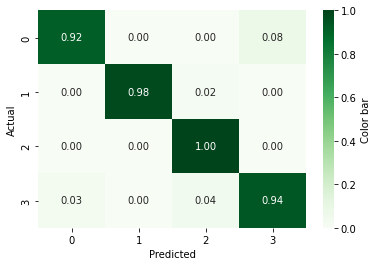

In [20]:
y_pred_res = my_predict(model,x_test)
y_pred_res = np.argmax(y_pred_res, axis=-1)
print(my_f1_score(y_test,y_pred_res))
my_conf_matrix(y_test,y_pred_res)

In [21]:
model.load_weights('/content/drive/MyDrive/bestmodel.hdf5')

In [22]:
newpath = r'/content/drive/MyDrive/archive/Model' 

if not os.path.exists(newpath):
    os.makedirs(newpath)

import pickle

pickle_out = open('/content/drive/MyDrive/archive/Model/model.pickle','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

In [24]:
end = time.time()
print((end - start)/60)

5.374265082677206


In [25]:
pickle_in = open('/content/drive/MyDrive/archive/Model/model.pickle','rb')
model = pickle.load(pickle_in)